# INF8215 - Intelligence artif.: méthodes et algorithmes 
## Automne 2019 - TP3 - Apprentissage machine 
### Membres de l'équipe
    - Alexandre Vielfaure
    - Hatim Belgharbi
    - Johan Ngounou

Nom d'équipe sur Kaggle: Team Angel



## Directives de remise
Le travail sera réalisé avec la  même équipe que pour les TPs précédents. Vous remettrez ce fichier nommé TP3\_NomDuMembre1\_NomDuMembre2\_NomDuMembre3.ipynb et vos fichiers de soumission csv dans la boîte de remise sur moodle. 

Tout devra être remis avant le **13 décembre à 23h55**. Tout travail en retard sera pénalisé d’une valeur de 10\% par jour de retard.

## Barème
Partie 1: 9 points

Partie 2: 9 points

Partie 3: 2 points

Bonus : 2 points

Pour un total de 22 points possibles sur 20 points.


## Apprentissage machine
L'apprentissage machine est un domaine de plus en plus exploré et exploité. Pouvoir faire des prédictions en se basant sur des données ouvre la porte à plein de possibilités pour faciliter la vie des gens. Par exemple, un modèle pourrait prédire si un patient souffre ou non d'une maladie en se basant sur des mesures de santé.

### But
Le but de ce TP est de vous donner un aperçu du déroulement général d'un projet de machine learning tout en vous familiarisant avec des librairies python adaptées.

Dans la première partie, vous implémenterez un algorithme de classification multiclasse appelé **softmax regression** à l'aide uniquement de la bibliothèque **numpy** et l'intégrerez à la bibliothèque **scikit-learn**.

Dans la deuxième partie, vous prendrez connaissance du **dataset** utilisé pour ce projet. Et vous serez amenés à effectuer le **preprocessing** de ces données pour qu'elles soient utilisables dans les algorithmes de machine learning classiques. Vous utiliserez les bibliothèques **pandas** et **scikit-learn**.

Enfin, dans la troisième partie, vous comparerez l'efficacité du modèle que vous avez implémenté avec d'autres modèles déjà implémentés dans **sklearn**. Puis vous tenterez d'améliorer les performances de l'algorithme sélectionné.

La dernière partie du TP est de soumettre vos prédictions sur **Kaggle**. Vous devez créer un compte et formez une équipe sur Kaggle: https://www.kaggle.com/. La compétition pour le TP se trouve à l'adresse suivante: https://www.kaggle.com/t/7e5ae1ae92d14e06b2560c9ac5602bf6.

### Installation

Pour installer **pandas** et **scikit-learn** le plus simple est de télécharger et d'installer **Anaconda**. Cet environnement python regroupe les packages les plus utilisés pour le calcul scientifique et la science des données. Vous pouvez aussi installer directement les packages avec pip.

Assurez-vous d'avoir au moins la version **20.0** de **scikit-learn**.

Vous trouverez la distribution d'anaconda ici : https://www.anaconda.com/download/ .


## Bonus 1: Compétition (2 points)

Lorsque vous soumettez vos résultats sur Kaggle, vous obtiendrez votre performance en terme de **Mean F-Score**. Votre score sera affiché sur le leaderboard publique de Kaggle.  Le top 10 sur le leaderboard privée recevront un bonus de 2pts. Vous pouvez soumettre plusieurs fois et choisir 2 soumissions pour être pris en compte pour le classement final. Attention de ne pas overfit sur les données de tests du classement publique.

# 1. Softmax Regression (12 points)

Dans cette partie vous implémenterez **softmax regression** la généralisation de **logistic regression** qui permet d'effectuer de la classification pour un nombre de classe supérieur à 2.

**Pour cet exercice, la contrainte est d'utiliser uniquement la bibliothèque numpy**

## Encapsulation avec sklearn

La classe **SoftmaxClassifier** hérite des classes **BaseEstimator** et **ClassifierMixin** de **scikit-learn** ce qui nous permettra d'utiliser facilement avec notre classifier les outils fournis par scikit-learn dans la suite du TP.

Pour la compatibilité, le classifier doit implémenter obligatoirement les méthodes:

* **fit**: responsable de l'entraînement du modèle
* **predict_proba**: permet de prédire la probabilité de chaque classe pour chaque exemple du dataset fourni.
* **predict**: permet de prédire la classe pour chaque exemple du dataset fourni.
* **score**: permet de quantifier l'écart entre les classes prédites et les classes réelles pour le dataset fourni
* **fit_predict**: permet de faire un fit et retourne les prédictions faites avec cet ensemble.


## Train/Test set:

Quand on veut tester les performances de l'apprentissage d'un algorithme de machine learning, on **ne le teste pas sur les données utilisées pour l'apprentissage**.

En effet, ce qui nous intéresse c'est que notre algorithme soit **capable de généraliser** ses prédictions à des données qu'il n'a **jamais vu**.

Pour illustrer, si on teste un algorithme sur les données d'entrainement, on teste sa capacité à **apprendre par coeur** le dataset et non à **généraliser**.

Par conséquent, quand on reçoit un nouveau dataset, la première chose à faire et de le **diviser en deux parties**: un ensemble d'**entraînement** (**70-80%** du dataset) et un ensemble de **test**(**20-30%** du dataset).

Tous les algorithmes de **traitement des données** et d'apprentissage devront être appris uniquement sur l'ensemble d'entraînement et appliqués ensuite sur l'ensemble de test.

Cela garantit l'absence de connaissances préalables de l'ensemble de test lors de l'entrainement.

## Gradient descent

La descente de gradient est un algorithme qui permet trouver la solution optimale d'un certains nombre de problèmes. Le principe est le suivant: on définit une **fonction de coût J**  qui caractérise le problème.
Cette fonction dépend d'un ensemble de paramètres $\theta$. La descente de gradient cherche à **minimiser** la fonction de coût en **modifiant itérativement** les paramètres.

### Gradient

Le gradient de la fonction de coût pour un $\theta$ donné, correspond à la direction dans laquelle il faut modifier $\theta$ pour augmenter la valeur de la fonction de coût. Cela correspond donc à la dérivée de la fonction de coût.
La fonction de coût est minimale quand le gradient est nul.

Concrètement, on initialize $\theta$ aléatoirement, et on effectue à chaque itération un pas pour réduire la fonction de coût jusqu'à convergence de l'algorithme à un minimum.

### Learning rate

Le taux d'apprentissage correspond à la taille du pas que l'on va effectuer dans la direction du gradient.
Plus il est grand, plus la convergence est rapide mais il y a un risque que l'algorithme diverge.

Plus il est petit, plus la convergence est lente.

### Batch gradient descent

Il existe plusieurs algorithmes de descente de gradient. Nous utiliserons Batch gradient descent.

Dans cet algorithme, avant de mettre à jour $\theta$, on calcule les gradients sur l'ensemble des exemples d'entraînement.

### Epoch

Il s'agit d'un pas de la descente de gradient, soit une mise à jour de gradient.

### Bias/Variance tradeoff

Lorsqu'on entraine un algorithme de machine learning on cherche un équilibre entre **biais** et **variance**.

Un modèle avec un **biais fort**, est un modèle qui est **trop simple** pour la structure donnée considérée (modèle linéaire pour données quadratiques), cela limite la capacité du modèle à généraliser. On appelle aussi le biais **underfitting**.

Un modèle avec une **variance élevée** signifie qu'il est sensible aux petites variations dans les données d'entrainement, cela correspond à l'**overfitting**, c'est-à-dire que le modèle est trop proche de la structure de l'ensemble d'entrainement ce qui **limite sa capacité à généraliser**.

Un modèle avec un **biais important** aura une **mauvaise performance** sur l'ensemble d'**entraînement**.
Un modèle avec une **variance importante** aura une performance bien **moins bonne** sur l'ensemble de **test** que sur l'ensemble d'**entrainement**.

Le classifier **SoftmaxRegression** contient les champs suivants:

- `lr` : le rythme d'apprentissage pour la mise à jour des points lors de la descente du gradient;
- `n_epochs`: le nombre d'itérations;
- `eps`: le seuil pour garder les probabilités dans l'intervalle [self.eps;1.-self.eps];
- `threshold`: seuil d'arrèt pour le early stopping;
- `early_stopping`: active le early stopping
- `nb_features`: le nombre d'attributs pour chaque instance
- `nb_classes`: le nombre de classes possible pour le dataset
- `theta_`:  la matrice de poids

In [26]:
import numpy as np
import math
import copy
import pandas as pd
import random
from sklearn.base import BaseEstimator, ClassifierMixin

class SoftmaxClassifier(BaseEstimator, ClassifierMixin):  

    def __init__(self, lr = 0.1, alpha = 100, n_epochs = 1000, eps = 1.0e-5,threshold = 1.0e-10 , early_stopping = True):
       
        self.lr = lr 
        self.alpha = alpha
        self.n_epochs = n_epochs
        self.eps = eps
        self.threshold = threshold
        self.early_stopping = early_stopping
        


    """
        In:
        X : l'ensemble d'exemple de taille nb_example x nb_features
        y : l'ensemble d'étiquette de taille nb_example x 1

        Principe:
        Initialiser la matrice de poids
        Ajouter une colonne de bias à X
        Pour chaque epoch
            calculer les probabilités
            calculer le log loss
            calculer le gradient
            mettre à jouer les poids
            sauvegarder le loss
            tester pour early stopping

        Out:
        self, in sklearn the fit method returns the object itself
    """

    def fit(self, X, y=None):
        
        prev_loss = np.inf
        self.losses_ = []

        self.nb_feature = X.shape[1]
        self.nb_classes = np.max(y) + 1

        #print(np.ones((X.shape[0],1)).shape)
        #print(X.shape)
        X_bias = np.concatenate([np.ones((X.shape[0],1)), X], axis=1)   
        
        self.theta_  = np.random.rand(self.nb_feature + 1, self.nb_classes)
        
#        z = np.dot(X_bias,self.theta_) # un vecteur de dimension K qui correspond aux logits associés à x pour chacune des classes

        for epoch in range( self.n_epochs):

            probabilities =  self.predict_proba(X_bias,y)
            
            loss = self._cost_function(probabilities, y)            
            self.theta_ = self.theta_ - (self.lr * self._get_gradient(X_bias,y, probabilities))

            if self.early_stopping:
                if np.abs(loss - prev_loss) < self.threshold:
                    break

            prev_loss = loss
            
        return self


    def predict_proba(self, X, y=None):
        try:
            getattr(self, "theta_")
        except AttributeError:
            raise RuntimeError("You must train classifer before predicting data!")
        #X_bias = np.concatenate(np.ones((X.shape[0],1)), X, axis=1)
        z = np.dot(X,self.theta_)
        
        p = self._softmax(z)
        
        return p

    
    def predict(self, X, y=None):
        try:
            getattr(self, "theta_")
        except AttributeError:
            raise RuntimeError("You must train classifer before predicting data!")
        X_bias = np.concatenate([np.ones((X.shape[0],1)), X], axis=1)
        p = self.predict_proba(X_bias)
        
        best_classes = np.argmax(p, axis = 1)
        
        return best_classes

    
    def fit_predict(self, X, y=None):
        self.fit(X, y)
        return self.predict(X,y)
 

    def score(self, X, y=None):
        probabilities = self.predict_proba(X, y)
        log_loss = self._cost_function(probabilities, y)
        return log_loss
    
    
    def _cost_function(self,probabilities, y): 
        probabilities = np.clip(probabilities,self.eps,1-self.eps)
        new_y = self._one_hot(y)
        cost = new_y * np.log(probabilities)
        cost = cost.sum(axis = 1)
        cost = cost.sum(axis = 0)
        cost = -1 * cost / probabilities.shape[0]
        return cost
    

    def _one_hot(self,y):
        y_ohe = np.zeros((y.shape[0],self.nb_classes))
        for i,j in enumerate(y):
            y_ohe[i,j] = 1
        return y_ohe

    
    def _softmax(self,z):
        
        p = np.exp(z).T                     # Transpose to sum on rows
        p = (p / p.sum(axis = 0)).T
        
        return p


    def _get_gradient(self,X_bias,y, probas):
        gradient = (X_bias.T @ (probas-self._one_hot(y))) / X_bias.shape[0]
        return gradient

### 1.1 One-hot-encoding (1 point)

En machine learning pour représenter un vecteur de données catégoriques, on utilise le one-hot encoding.

Pour un vecteur comportant 5 exemples et 3 catégories différentes, on le représente sous forme d'une matrice de taille 5 par 3. Cette matrice est entièrement remplie de 0 sauf à l'indice correspondant au numéro de la classe pour chaque exemple.


Par exemple
$ y = \left(\begin{array}{cc} 
0 \\
0 \\
1 \\
2 \\
1 \\
\end{array}\right) $

devient:

$ yohe =  \left(\begin{array}{cc} 
1. & 0. & 0.\\
1. & 0. & 0.\\
0. & 1. & 0.\\
0. & 0. & 1.\\
0. & 1. & 0.\\
\end{array}\right) $


#### Implémentation
1. Implémentez  la fonction  *`_one_hot()`*  dans SoftmaxClassifier. 

Utilisez la fonction _testOneHot_ pour vérifier votre implémentation de la fonction. Vous devriez avoir ces résultats:
```
Premier test
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]]

Deuxième test
[[0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]]

 Troisième test
[[1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]]
 ```

In [27]:
def testOneHot():
    softmax = SoftmaxClassifier()
    softmax.nb_classes = 6 # les classes possibles sont donc 0-5

    y1= np.array([0,1,2,3,4,5])
    y1.shape = (6,1)
    print('Premier test')
    print(softmax._one_hot(y1))

    y2 = np.array([5,5,5,5])
    y2.shape = (4,1)
    print('\nDeuxième test')
    print(softmax._one_hot(y2))

    y3 = np.array([0,0,0,0])
    y3.shape = (4,1)
    print('\nTroisième test')
    print(softmax._one_hot(y3))


testOneHot()

Premier test
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]]

Deuxième test
[[0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]]

Troisième test
[[1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]]


### 1.2 Matrice de poids (1 point)

Soit $ X_{m * n} $ la matrice d'exemple et $ \Theta _{n*K} $ la matrice de poids avec:

* **m** le nombre d'exemples
* **n** le nombre de features
* **k** le nombre de classes

Il est d'usage d'ajouter une colonne supplémentaire à X. Cette colonne est remplie de 1 et se trouve au début de la matrice. Elle représente un biais. Pour prendre en compte ce changement, il faut aussi rajouter une ligne à la matrice $\Theta$.

On obtient X_bias$_{m*(n+1)}$ et $ \Theta _{(n+1)*K} $


Intuitivement, à chaque classe K est associée une colonne de $\theta$.

On note $\theta_k$ le vecteur de dimension n+1 la colonne de poids associée à la prédiction de la classe k.

$\Theta$ = [$\theta_0$,$\theta_1$... $\theta_k$]

Ainsi $ z = x * \Theta $ donne un vecteur de dimension K qui correspond aux **logits** associés à x pour chacune des classes.

#### Implémentation
1. Instanciez X_bias dans les fonctions  *`fit()`* et `predict_proba()`.
2. initialisez $\Theta$ aléatoirement dans la fonction  *`fit()`*.
3. Instanciez aussi le nombre de features et de classe de SoftmaxClassifier dans la fonction  *`fit()`*.

**Notez que votre fonction fit n'est pas encore complète.**

### 1.3 Softmax (1 point)

On veut convertir le vecteur de logits **z** obtenu dans la partie précédente, en un **vecteur de probabilité**.

Pour cela on définit la **fonction softmax**:

$$ \hat{p_x}^k = softmax(z)_k = \frac{exp(z_k)}{\sum_{\substack{1<j<K}} exp(z_j)} $$

Intuitivement, pour un logit de z, $z_k$, on prend l'exponentielle de cette valeur et on la divise par la somme des exponentielles de chaque logit du vecteur **z**. On obtient  $\hat{p_x}^k$ la probabilité que l'exemple **x** appartienne à la classe **k**.

On réitère l'opération pour chaque logit du vecteur **z**. 

On obtient ainsi un vecteur de probabilités $\hat{p_x}$ pour un exemple **x**. 

La division permet de rendre la somme des termes du vecteur $\hat{p_x}$ égale à 1 ce qui est indispensable dans le cadre des probabilités.

#### Implémentation
1. Implémentez  la fonction  *`_softmax()`*  dans SoftmaxClassifier. 

### 1.4 Prédictions (1 point)

Maintenant que vous avez implémentée la fonction **_softmax**, vous pouvez implémenter  les fonctions  **predict_proba** et **predict**  dans SoftmaxClassifier. 

#### Implémentation
1. Implémenter la fonction *`predict_proba()`* de la classe SoftmaxClassifier. Cette fonction retourne les probabilités associées à chaque classe pour chacune des instances à prédire.

2. Implémenter la fonction *`predict()`* de la classe SoftmaxClassifier. Cette fonction retourne la classe avec la plus grande probabilité pour chacunes des intances à prédire.

### 1.5 Fonction de coût Log loss (2 points)

Soit la fonction de coût log loss (ou cross entropy):

$$ J( \Theta) = \frac{-1}{m}\sum_{\substack{1<i<m}} \sum_{\substack{1<k<K}} y_k^i log( \hat{p_k}^i ) $$

avec:
* **K** le nombre de classes
* **m** le nombre d'exemples dans les données
* $ \hat{p_k}^i  $  la probabilité que l'exemple i soit de la classe k
* $y_k^i$ vaut 1 si la classe cible de l'exemple i est k, 0 sinon

Le coût correspond donc à la moyenne multiplié par -1 des sommes des multiplications des probabilités pour chaque classe pour chaque élement. Autrement dit, plus le coût est petit, plus les prédictions correspondent bien aux étiquettes.


**Détail d'implémentation:** La fonction n'est pas définie pour des valeurs de probabilité de 0 ou 1. Il faut donc s'assurer que étant donné $\epsilon$, les probabilités sont comprises dans [$\epsilon$, 1. - $\epsilon$].
#### Implémentation
1. Implémentez  la fonction  *`_cost_function()`*  dans SoftmaxClassifier en prenant en utilisant la variable self.eps. Utilisez le format one-hot pour représenter $y_k^i$.
2.  Utilisez *`_cost_function()`* pour calculer la variable *`loss`* dans la fonction `fit()`

### 1.6 Gradient de la fonction de coût (1 point)

Le **gradient de J** par rapport à la classe k (par rapport à $\theta_k$) est :


$$ \Delta_{\theta_k}J( \Theta) = \frac{1}{m} \sum_{\substack{1<i<m}}( \hat{p_k}^i - y_k^i)x^i  $$

avec:
* **K** le nombre de classes
* **m** le nombre d'exemples dans les données
* $ \hat{p_k}^i  $  la probabilité que l'exemple i soit de la classe k
* $y_k^i$ vaut 1 si la classe cible de l'exemple i est k, 0 sinon

Sous **forme matricielle**, on peut écrire le **gradient de J par rapport à $\Theta$**:
$$ \Delta_J( \Theta) = \frac{1}{m} X_{bias}^T *( \hat{p} - y_{ohe}) $$

avec:
* $\hat{p}$ la matrice de probabilité prédite pour chaque example et pour chaque classe
* $y_{ohe}$ la version one-hot de y
* $X_{bias}^T$  la matrice transposée de $X_{bias}$
* **\*** le produit matriciel

#### Implémentation
1. Implémentez  la fonction  *`_get_gradient()`*  dans SoftmaxClassifier en vous basant sur la forme matricielle du gradient.

### 1.7 Mise à jour des poids (1 point)

Quand le gradient a été calculé, il faut mettre à jour les poids avec ces gradients.

$$ \Theta  = \Theta - \gamma \Delta J( \Theta) $$


avec:
* $\Theta$ la matrice de poids
* $\gamma$  le taux d'apprentissage
* $\Delta J( \Theta)$ le gradient de $J( \Theta)$ selon $\Theta$

#### Implémentation
1. Mettez à jour la variable **self.theta_** dans la fonction `fit()`  dans SoftmaxClassifier.

### 1.8 Évaluation (1 point)

Quand on veut évaluer la performance du modèle **après entrainement**, on utilise la fonction de coût. Autrement dit, on compare les prédictions avec les vrais valeurs et calcule un score.

#### Implémentation
1. Implémentez la fonction `score()` qui permet d'évaluer la qualité de la prédiction **après entrainement** dans SoftmaxClassifier. Elle utilise le log loss comme métrique.

### 1.9 Early stopping (1 point)

Un trop grand nombre d'**epoch** peut résulter en **overfitting**.
Pour pallier à ce problème, on peut utiliser le mécanisme d'**early stopping**.
Il s'agit d'arrêter l'entraînement si la différence de la fonction de coût entre deux **epochs consécutives** est inférieure à un **seuil**.




#### Implémentation

1. Ajouter le mécanisme d'**early stopping**  quand le booléen **self.early_stopping** est vrai dans la fonction `fit()`. Le seuil est donné par la variable **self.threshold**.

### 1.10 Test de la solution (2 points)

Le code ci-dessous importe le dataset de classification multiclasse **iris** disponible sur sklearn. Les données sont divisées en deux parties, l'ensemble d'entraînement et l'ensemble de test, puis elles sont normalisées.

Le classifier est entrainé sur l'ensemble d'entrainement et testé sur l'ensemble de test.

Le but de cette partie est juste de vérifier votre implémentation **quand vous êtes sûrs que votre code fonctionne**.

In [28]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# load dataset
data,target =load_iris().data,load_iris().target

# split data in train/test sets
X_train, X_test, y_train, y_test = train_test_split( data, target, test_size=0.33, random_state=42)

# standardize columns using normal distribution
# fit on X_train and not on X_test to avoid Data Leakage
s = StandardScaler()
X_train = s.fit_transform(X_train)
X_test = s.transform(X_test)

In [29]:
cl = SoftmaxClassifier()

# train on X_train and not on X_test to avoid overfitting
train_p = cl.fit_predict(X_train,y_train)
test_p = cl.predict(X_test)

Si vous obtenez des valeurs relativement proches pour l'ensemble de test et d'entrainement, et qu'elles sont au moins supérieures à 0.8, votre modèle devrait être correct

In [30]:
from sklearn.metrics import precision_recall_fscore_support

# display precision, recall and f1-score on train/test set
print("train : "+ str(precision_recall_fscore_support(y_train, train_p,average = "macro")))
print("test : "+ str(precision_recall_fscore_support(y_test, test_p,average = "macro")))

train : (0.9729729729729729, 0.9714285714285714, 0.9709901198234182, None)
test : (0.9791666666666666, 0.9791666666666666, 0.978494623655914, None)


# 2. Data preprocessing (6 points)

##  Kaggle 
Kaggle est un site dédié au machine learning. On y retrouve un grand nombre de dataset.
Des compétitions sont organisées par des organisations. Ces dernières fournissent un dataset et un objectif. Les "kagglers" qui participent à ces compétitions soumettent leurs résultats en ligne. Il y a souvent des prix ou des emplois pour ceux qui obtiennent les meilleurs résultats.

Il s'agit d'un bon moyen pour développer ses compétences en machine learning sur des vrais datasets.

Vous devez créer un compte et formez une équipe sur Kaggle: https://www.kaggle.com/. La compétition pour le TP se trouve à l'adresse suivante: https://www.kaggle.com/c/tp3-inf8215-a19.


## Income dataset
Le dataset que nous utiliserons est le "Income dataset" disponible sur le site de la compétition. C'est une version modifiée du dataset "Adult" de UCI qui se trouve à cette adresse: https://archive.ics.uci.edu/ml/datasets/Adult.

Il s'agit d'un problème de **classification binaire** du salaire de la personne. Le but est de prédire dans quel catégorie ils appartiennent:
* $\lt=50K$
* $\gt50K$

Pour plus d'informations sur les données, lisez la description sur kaggle.

## Déroulement d'un projet de machine learning

Le but de la suite de ce TP est de vous faire étudier une version simplifiée d'un projet complet de machine learning:

1. Nettoyage des données, traitement des valeurs manquantes
2. Mise en forme des données pour pouvoir les utiliser dans les algorithmes de machine learning
3. Feature engineering: transformation ou combinaison de features entre elles
4. Comparaison des performances des différents choix effectués lors du traîtement des données
5. Comparaison des performances de différents modèles (dont celui implémenté en première partie)
6. Optimisation des hyper-paramètres

## Scikit-learn
http://scikit-learn.org/stable/

Il s'agit d'une bibliothèque de machine learning et data mining, elle propose des outils pour l'analyse et le traîtement des données,  des algorithmes classiques de machine learning comme les réseaux de neuronnes, la régression logistique, les SVM ou autre, enfin des outils permettant de comparer les modèles entre eux comme la cross validation.

## Pandas

Une bibliothèque permettant de stocker des données et de les manipuler facilement

Les deux éléments de base de pandas sont le dataframe et la serie.

https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DataFrame.html

## Data processing tutorial

**Avant de continuer le TP**, familiarisez-vous avec le **pré-traitement des données**, **pandas** et **scikit-learn**, un tutoriel est disponible dans le fichier: **data_processing_tutorial.ipynb**

## Dataset

#### Chargement de l'ensemble d'entraînement et de l'ensemble de test

In [31]:
# SI ON CHOISI DE NE PAS TOUCHER AU DATASET, LE MENTIONNER
# SI ON CHOISIT D'OMMETTRE UNE VARIABLE, LE MENTIONNER
# 1ere LIGNE c'est le nom des colonnes pour la soumission sur Kagle
import pandas as pd

PATH = "data/" # changer le path avec votre path
X_train = pd.read_csv("train.csv")
X_test = pd.read_csv("test.csv")

#### 5 premiers exemples de l'ensemble d'entraînement

In [32]:
X_train.head()

,index,Age,Workclass,Final weight,Education,Marital-status,Occupation,Relationship,Sex,Capital-gain,Capital-loss,Hours per week,Native country,Income
0,36721,36,Private,31023,Masters,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,50,United-States,>50K.
1,2638,52,?,159755,Assoc-voc,Married-civ-spouse,?,Husband,Male,0,0,50,United-States,>50K
2,36214,36,Private,359001,Assoc-voc,Divorced,Craft-repair,Not-in-family,Male,0,0,40,United-States,<=50K.
3,27010,42,Self-emp-inc,188615,Bachelors,Married-civ-spouse,Sales,Husband,Male,0,0,60,United-States,>50K
4,27506,44,Private,43711,Bachelors,Never-married,Other-service,Not-in-family,Male,0,0,48,United-States,<=50K


#### 5 premiers exemples de l'ensemble de test

In [33]:
X_test.head()

,index,Age,Workclass,Final weight,Education,Marital-status,Occupation,Relationship,Sex,Capital-gain,Capital-loss,Hours per week,Native country
0,7762,18,Private,423024.0,HS-grad,Never-married,Other-service,Not-in-family,Male,0.0,0.0,20.0,United-States
1,23881,17,Private,178953.0,12th,Never-married,Sales,Own-child,Female,0.0,0.0,20.0,United-States
2,30507,25,Local-gov,348986.0,HS-grad,Never-married,Handlers-cleaners,Other-relative,Male,0.0,0.0,40.0,United-States
3,28911,20,Private,218215.0,Some-college,Never-married,Sales,Own-child,Female,0.0,0.0,30.0,United-States
4,19484,47,Private,244025.0,HS-grad,Never-married,Machine-op-inspct,Unmarried,Male,0.0,0.0,56.0,Puerto-Rico


## Travail demandé

En vous appuyant sur le tutoriel fourni, vous devez écrire un pipeline complet de transformation pour chacune des colonnes du dataset.

Vous êtes **libres** de vos choix, mais vous devez les **justifer** colonne par colonne.
Par exemple, vous pouvez choisir de combiner des colonnes entre elles, de séparer une colonne en plusieurs ou encore d'éliminer complètement une colonne si vous le justifiez correctement.


####  2.1 Preprocessing (3 points)

Vous devez justifier toutes les transformations que vous faites sur les données pour faciliter l'utilisation des données lors de l'entraînement du modèle. Vous pouvez justifier avec de la logique ou des preuves numériques. **Attention de ne pas tomber dans le piège du overfitting**.

**ATTENTION** Vous devez avoir un meilleur score que le baseline pour le classement privé pour avoir votre point au complet pour la partie 2.1. Ce score est une bonne mesure pour savoir si votre traitement est correct.

1. Justifier tous les choix de traitements que vous faites ici.

In [34]:
def generate_missing_value_table(df):
        value = df.isnull().sum()
        value_percentage = 100 * df.isnull().sum() / len(df)
        table = pd.concat([value, value_percentage], axis=1)
        
        # rename the original table
        renamed_table = table.rename(columns = {0 : "Missing values", 1 : "% of missing values"})
        renamed_table = renamed_table[renamed_table.iloc[:,1] != 0].sort_values("% of missing values", ascending=False).round(1)
        
        return renamed_table

X_train_NaN = X_train.replace(" ",np.nan)
X_train_NaN = X_train.replace(" ?",np.nan)
# Finding all missing values
missing_values_table = generate_missing_value_table(X_train_NaN)

display(missing_values_table)

,Missing values,% of missing values
Occupation,1873,5.7
Workclass,1863,5.7
Native country,580,1.8


On remarque que 3 colonnes possèdent des données manquantes avec un proportion faible. Nous avons décidé de remplacer les données manquantes par une variable unknown. 

In [35]:
X_train_NaN["Occupation"] = X_train_NaN["Occupation"].replace(np.nan," Unknown_occ")
X_train_NaN["Workclass"] = X_train_NaN["Workclass"].replace(np.nan," Unknown_wc")
X_train_NaN["Native country"] = X_train_NaN["Native country"].replace(np.nan," Unknown_nc")

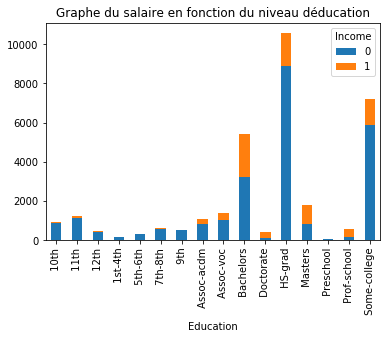

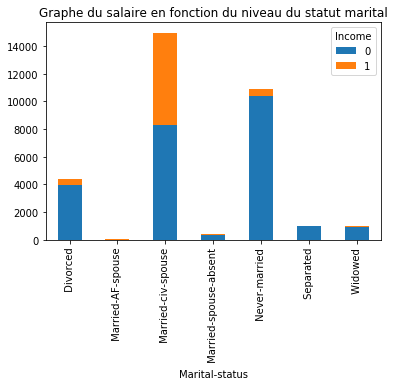

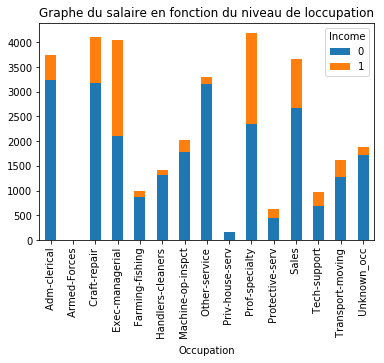

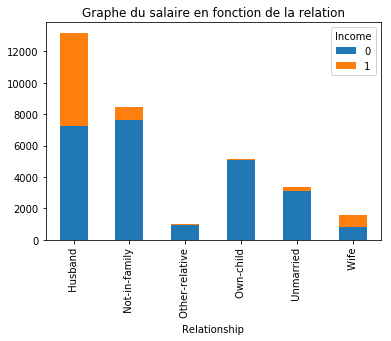

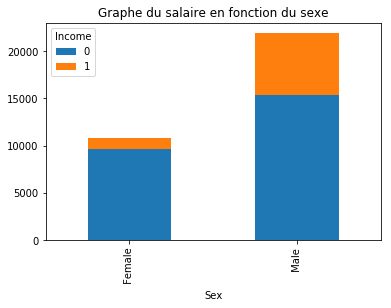

In [36]:
pd.options.mode.chained_assignment = None

# On change l'income en valeurs binaires
income_dict = {
                " <=50K" : 0,
                " <=50K." : 0,
                " >50K" : 1,
                " >50K." : 1,
                }
X_train_NaN = X_train_NaN.replace({"Income": income_dict})

# On retire l'indexe et le "Final weight", car ils sont non pertinents
X_train_NaN.drop(["index","Final weight"], axis = 1, inplace = True)

# Age
X_train_NaN["Age"][X_train_NaN["Age"]<20] = 20
X_train_NaN["Age"][X_train_NaN["Age"]>65] = 65
X_train_NaN["Age"] = np.digitize(X_train_NaN["Age"],np.arange(20,65,5)) - 1

#Worclass
a=pd.get_dummies(X_train_NaN["Workclass"])
X_train_NaN = pd.concat([X_train_NaN,a],axis = 1).drop(["Workclass"],axis = 1)

# Éducation
X_train_NaN.groupby(['Education','Income']).size().unstack().plot(kind='bar',stacked=True,title = 'Graphe du salaire en fonction du niveau d''éducation')

education_dict = {
                " HS-grad" : 1,
                " Some-college" : 3,
                " Bachelors" : 4,
                " Masters" : 5,
                " Assoc-voc" : 2,
                " 11th" : 0,
                " Assoc-acdm" : 2,
                " 10th" : 0,
                " 7th-8th" : 0,
                " Prof-school" : 6,
                " 9th" : 0,
                " 12th" : 0,
                " Doctorate" : 7,
                " 5th-6th" : 0,
                " 1st-4th" : 0,
                " Preschool" : 0
                }
X_train_NaN['Education'] = X_train_NaN['Education'].map(education_dict)

# Marital-status
X_train_NaN["Marital-status"].value_counts()
X_train_NaN.groupby(['Marital-status','Income']).size().unstack().plot(kind='bar',stacked=True,title='Graphe du salaire en fonction du niveau du statut marital')
marital_dict = {
                " Married-civ-spouse" : 'Married',
                " Never-married" : 'Not Married',
                " Divorced" : 'Not Married',
                " Separated" : 'Not Married',
                " Widowed" : 'Not Married',
                " Married-spouse-absent" : 'Married',
                " Married-AF-spouse" : 'Married',
                }
X_train_NaN['Marital-status'] = X_train_NaN['Marital-status'].map(marital_dict)
a=pd.get_dummies(X_train_NaN['Marital-status'])
X_train_NaN = pd.concat([X_train_NaN,a],axis = 1).drop(['Marital-status'],axis = 1)


# Occupation
X_train_NaN.groupby(['Occupation','Income']).size().unstack().plot(kind='bar',stacked=True,title='Graphe du salaire en fonction du niveau de l''occupation')
a=pd.get_dummies(X_train_NaN['Occupation'])
X_train_NaN = pd.concat([X_train_NaN,a],axis = 1).drop(['Occupation'],axis = 1)


# Relationship
X_train_NaN.groupby(['Relationship','Income']).size().unstack().plot(kind='bar',stacked=True,title='Graphe du salaire en fonction de la relation')
a=pd.get_dummies(X_train_NaN['Relationship'])
X_train_NaN = pd.concat([X_train_NaN,a],axis = 1).drop(['Relationship'],axis = 1)


# Sex
X_train_NaN.groupby(['Sex','Income']).size().unstack().plot(kind='bar',stacked=True,title='Graphe du salaire en fonction du sexe')
education_dict = {
                " Male" : 1,
                " Female" : 0,
                }
X_train_NaN['Sex'] = X_train_NaN['Sex'].map(education_dict)


#Capital gain/loss
X_train_NaN['Capital-gain'][X_train_NaN['Capital-gain'] < 5100] = 0
X_train_NaN['Capital-gain'][X_train_NaN['Capital-gain'] >= 5100] = 1
X_train_NaN['Capital-loss'][X_train_NaN['Capital-loss'] > 0] = -1
X_train_NaN['Capital-loss'] += 1

#Hours
X_train_NaN["Hours per week"][X_train_NaN["Hours per week"] < 35] = 0
X_train_NaN['Hours per week'][(X_train_NaN['Hours per week'] < 45) & (X_train_NaN['Hours per week'] >= 35)] = 1
X_train_NaN['Hours per week'][X_train_NaN['Hours per week'] >= 45] = 2

#Country
country_dict = {
 ' United-States':'N_america',
 ' Mexico':'S_america'     ,                 
 ' Philippines':'Asia',
 ' Germany':'Europe',
 ' Puerto-Rico':'S_america',
 ' Canada':'N_america',
 ' India':'Asia',
 ' Cuba':'S_america',
 ' El-Salvador':'S_america',
 ' China':'Asia',                
 ' South':'S_america',                  
 ' Italy':'Europe',                     
 ' England':'Europe',
 ' Jamaica':'S_america', 
 ' Dominican-Republic':'S_america',
 ' Guatemala':'S_america', 
 ' Japan'  : 'Asia',                            
 ' Columbia' : 'S_america',                         
 ' Vietnam' : 'Asia',
 ' Poland' : 'Europe',
 ' Portugal' : 'Europe',
 ' Haiti' : 'S_america',
 ' Taiwan' : 'Asia',
 ' Greece' : 'Europe',
 ' Iran' : 'Asia',
 ' Nicaragua' : 'S_america',
 ' Peru' : 'S_america',
 ' Ireland': 'Europe',
 ' Ecuador' : 'S_america',
 ' Thailand' : 'Asia',
 ' France' : 'Europe',
 ' Cambodia' : 'Asia',
 ' Hong': 'Asia',
 ' Hungary' : 'Europe',
 ' Trinadad&Tobago' : 'Africa',
 ' Yugoslavia' : 'Europe',
 ' Laos' : 'Asia',
 ' Scotland' : 'Europe',                         
 ' Outlying-US(Guam-USVI-etc)': 'S_america',
 ' Honduras' : 'S_america',
                }
X_train_NaN['Native country'] = X_train_NaN['Native country'].map(country_dict)
a=pd.get_dummies(X_train_NaN['Native country'])
X_train_NaN = pd.concat([X_train_NaN,a],axis = 1).drop(['Native country'],axis = 1)

#Normalisation
X_train = X_train_NaN / X_train_NaN.max()


Colonne(s) | Traitement | Justification |
 :---: | :---: | :---: |
 Index | On l'enlève complètement. | Pas significatif pour l'analyse |
 Final Weight | On l'enlève complètement. | Pas significatif pour l'analyse |
 Âge | Pour âge < 20 : Mise à 20 ;Pour âge > 65 mise à 65; Pour âge [20,65] : regroupement par tranche de 5 et numérisation de chaque groupe avec un chiffre allant de 0 à 7(nombre de groupes-1).| Généralement le salaire augmente avec l'âge, mais à des différences de tranche de 5 ans, ce n'est pas significatif. On a considéré que pour les âges inférieurs à 20, ils auraient sensiblement le même salaire. Cela vaut de même pour les âges > à 65| 
 Workclass | One-hot encoding | Ce sont des variables qui ne peuvent pas être gradées, raison pour laquelle un traitement one-hot encoding a été effectué. Puisqu'il n'y avait que 8 valeurs différentes, aucun regroupement n'a été effectué.  | 
 Education | Nous avons groupé et numérisé. | Puisque les valeurs peuvent être graduées, nous avons effectué une numérisation. Nous avons regroupé les degrés d'éducation relativement similaire (voir graphique).| 
 Marital status| On avons groupé et effectué un one-hot encoding| Nous avons groupé les status en deux catégories car ces 2 groupes présentaient la plus grande différence de salaire (voir grahique)|
 Occupation | On a effectué un one-hot encoding.| Nous avons fait du one-hot encoding car ce sont des valeurs nominales (on ne peut les grader). Aucun regroupement n'a été fait car tous les rapports haut revenu/bas revenu étaient différents (voir graphique) |
 Relationship | On a effectué un one-hot encoding.  | Les valeurs sont nominales (on ne peut les grader).Aucun regroupement n'a été fait car tous les rapports haut revenu/bas revenu étaient différents (voir graphique) | 
 Sex | Binarisation des valeurs| Il n'y a que deux groupes différents|
 Capital-gain | Groupées en deux et binarisées | En inspectant les données, au délà d'une certaine valeur, la proportion de haut revenu était plus grande. Étant donné qu'il n'y avait que 2 groupes, les données ont été binarisées|
 Capital-loss | Groupées et binarisées| En inspectant les données, au dessous d'une certaine valeur, la proportion de bas revenu était plus grande. Étant donné qu'il n'y avait que 2 groupes, les données ont été binarisées|
 Hours | Groupées en trois (0-35, 35-45, >45) et numérisées|Étant donné que généralement, le salaire augmente avec le nombre d'heures travaillées, une numérisation des variables a pu être effectuée. Les valeurs ont été groupées pour avoir une plus grande différence de salaire. |
 Native Contry | Groupés par continent et one-hot encoding| One-hot encoding car les valeurs sont nominales (non gradables). Ils sont groupés en régions similaires|
 Income | Groupés en deux et binarisés (<=50K et >=50K) | Regroupement par tranches de salaire et étant donné qu'il n'y a que 2 tranches, seulement une binarisation est effectuée.|

# 3. Model selection (2 points)

Encodage de la classe cible sous forme d'entiers pour l'utiliser
avec les algorithmes de scikit-learn. Vous devez avoir 2 classes.

In [37]:
from sklearn.preprocessing import LabelEncoder
y_train = X_train['Income']
X_train = X_train.drop('Income',axis=1)
target_label = LabelEncoder()
y_train_label = target_label.fit_transform(y_train)
print(target_label.classes_)

[0. 1.]


## 3.1 Ensemble de validation (0.5 point)
Pour comparer différents modèles entre eux, on ne peut pas utiliser
l'ensemble de test, sinon on serait tenté de garder le modèle correspondant le mieux à l'ensemble de test ce qui pourrait conduire à l'overfitting.

Il est d'usage de créer un nouvel ensemble de la taille de l'ensemble de test, l'ensemble de **validation**.

###  Cross-validation

La cross-validation est une méthode utile pour comparer la performance de différents modèles de machine learning **sans créer d'ensemble de validation**.

Il existe différents types de cross-validation, la procédure la plus classique est la suivante:
* Diviser aléatoirement l'ensemble d'entraînement en deux parties (90%/10% par exemple).
* Entraîner le modèle sur la plus grande partie, et le tester sur l'autre partie.
* Recommencer n fois
* Calculer la moyenne et l'écart type des résultats

Les avantages sont les suivants:
* Considérer la totalité de l'ensemble d'entraînement pour l'évaluation (sans se priver de l'ensemble de validation)
* Obtenir l'écart-type des résultats permet une meilleure évaluation de la précision du modèle.

L'inconvénient principal est le temps de calcul, étant donné que l'on effectue l'apprentissage du modèle plusieurs fois, cette méthode peut être impossible pour des datasets contenant un grand nombre d'exemple (> 10e5)

### Implémentation
1. Implémenter la fonction `compare()`. Cette fonction effectue la crossvalidation pour différents modèles et retourne la moyenne et l'écart-type des métriques pour chaque modèle.



In [38]:
from sklearn.model_selection import cross_validate
def compare(models,X_train,y_train,nb_runs,scoring):
    
    scores = []
    for i in models:
        scores.append(cross_validate(i, X_train, y_train, cv=nb_runs, scoring = scoring))
    
    return scores

## 3.2 Essai de modèle de sklearn (0.5 point)


**Choisir au moins deux modèles permettant la classification binaire sur sklearn en plus du modèle implémenté dans la première partie du TP**.

**En vous basant sur les différentes métriques retournées par la fonction `compare()`, concluez quant au modèle le plus performant.**

Evaluez les modèles pour les différentes métriques proposées:
* **log loss**: c'est la métrique d'évaluation de kaggle
* **precision**: correspond à la qualité de la prédiction, le nombre de classes correctement prédites par le nombre de prédiction total
* **recall**: le nombre d'éléments appartenant à une classe, identifiés comme tel, divisé par le nombre total des éléments de cette classe.
* **f-score**: une moyenne de la precision et du recall

**Remarque: precision et recall sont deux mesures complémentaires pour l'évaluation d'un modèle de classification.**

Dans le cas d'une classification binaire avec un déséquilibre de la classe cible important, (90%/10%), en évaluant le résultat de la classification avec l'accuracy (nombre de prédictions correctes divisé par le nombre de prédictions total), on peut obtenir un très bon score (90% d'accuracy) en choisissant de prédire systématiquement la classe majoritaire.

Dans un tel cas, la precision serait élevée de même, mais le recall serait très bas , nous indiquant la médiocrité de notre modèle.


In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import svm

X_train_preprocess = np.array(X_train)

nb_run = 3

models = [
    SoftmaxClassifier(),
    RandomForestClassifier(n_estimators = 100),
    GradientBoostingClassifier(),
]

scoring = ['neg_log_loss', 'precision_macro','recall_macro','f1_macro']

score = compare(models,X_train_preprocess,y_train_label,nb_run,scoring[3])

Score_dataframe = np.zeros((3,2))
for i in range(len(score)):
    Score_dataframe[i,0] = score[i]['test_score'].mean()
    Score_dataframe[i,1] = score[i]['test_score'].std()

Score_dataframe = pd.DataFrame(Score_dataframe)
Score_dataframe.columns = ['Moyenne','STD']
Score_dataframe.index = ['SoftmaxClassifier','RandomForest','GradientBoosting']
display(Score_dataframe)

,Moyenne,STD
SoftmaxClassifier,0.775845,0.001587
RandomForest,0.771300,0.003527
GradientBoosting,0.785366,0.000655


**Justifications**



## 3.3 Matrice de confusion (0.5 point)

La matrice de confusion A est telle que $A_{i,j}$ correspond au nombre d'exemples de la classe i classifié comme appartenant à la classe j.

Entrainez le modèle sélectionné sur la totalité de l'ensemble d'entraînement.
A l'aide de la matrice de confusion et de la distribution des classes, analysez plus en détail les performances du modèle choisi et **justifiez** les.

In [44]:
# Train selected model

selected_model = SoftmaxClassifier()
y_pred = selected_model.fit_predict(X_train_preprocess,y_train_label)

###### Matrice de confusion

In [45]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_train_label, y_pred), columns = target_label.classes_, index = target_label.classes_)

,0.0,1.0
0.0,23451,1498
1.0,3342,4432


###### Distribution des classes

[0. 1.]


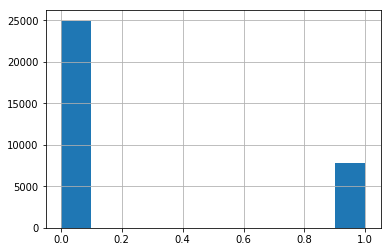

In [46]:
import matplotlib.pyplot as plt 
print(target_label.classes_)
pd.Series(y_train_label).hist()

***Justifications***

On se rend compte que la classe 1 est beaucoup moins peuplée que la classe 0. Il y a donc un débalancement qui peut affecter le training. En l'occurence c'est le cas car on observe une performance inférieure pour prédire la classe 1 vs la classe 0 dans la matrice de confusion. Il y a plus d'erreurs dans la case inférieure gauche (classe réelle 1, prédiction 0) que dans la case haut droite (classe réelle 0, prédiction 1). 

## 3.4 Soumission (0.5 point)

Enfin, effectuez la prédiction sur l'ensemble de test et joignez les résultats au rendu du TP. Vous devez soumettre vos résultats sur kaggle. Vous pouvez choisir jusqu'à deux modèles. Par défaut, les deux dernières soumissions sont prises. La justification (les section 3.2 et 3.3) sont seulement demandée pour le meilleur modèle selon vous.

**ATTENTION:** N'oubliez pas de respecter le format du fichier de soumission. En cas d'erreur, Kaggle score 0.0 pour la soumission.

In [0]:
# best_model_1 = 
# pred_test = pd.Series(best_model_1.transform(X_test_preprocess))
# pred_test.to_csv("test_prediction_1.csv",index = False)

# best_model_2 = 
# pred_test = pd.Series(best_model_2.transform(X_test_preprocess))
# pred_test.to_csv("test_prediction_2.csv",index = False)